[View in Colaboratory](https://colab.research.google.com/github/Sriyesh/Python-machine-learning/blob/master/Titanic.ipynb)

#Titanic Survival Predictoion For Beginners
I am a newbie to machine learning. This project is my first attempt on any dataset (Titanic: Machine Learning from Disaster dataset). I will try my level best to way you through every step. If you find this useful please consider upvoting.

##Contents:


1.   Import Necessary Libraries
2.   Read and Explore the data
3.   Data Analysis
4.   Data Visualization
5.   Cleaning Data
6.   Selecting the Model
7.   Creating Submission File

####I have used google's colab for my program. Any and all feedback is welcome!



In [0]:
#this is to access data set stored in google drive
!pip install pydrive
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1P5TEV4hmUYFEKaS7TFa6ov8ykkK2cp3e'})
myfile2 = drive.CreateFile({'id': '1n3SVpNQXGqhJDSn53uix3UJU6LbYw6t7'})
myfile.GetContentFile('train.csv')
myfile2.GetContentFile('test.csv')


# **1) Import Necessary Library**
We will use numpy for numerical calculation, pandas for manupulation of data, matplotlib and seaborn for visualization. %matplotlib inline will make your plot outputs appear and be stored within the notebook

In [0]:
# data analysis library
import numpy as np
import pandas as pd

# Visuvalization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')


#2) Read And Explore Data
we will use  pd.read_csv  function to read data from a csv file and store it in a data frame(train).
View the first 3 entries of the tain using train.head(3) 

In [4]:
# import train and test CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#see the first 3 rows of train
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#Look into the training data
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hickman, Mr. Lewis",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#3) Data Analysis
We are going to consider features in our dataset and see how complete they are.

In [6]:
# get a list of features
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
#see a sample of the dataset to get an idea of variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S


-  **Numeical Features:** Age(continuous), Fare(Continuous) SibSp(Discrete), Parch(Discrete)
-  **Categorical Features:** Survived,Sex,Embarked,Pclass
-  **Alphanumeric Features:** Tickets,Cabin

##what are the data type for each feature?
-  Survived: int
-  Pclass: int
-  Name: string
-  Sex: string
-  Age: float
-  SibSp: int
-  Parch: int
-  Ticket: string
-  Fare: float
-  Cabin: string
-  Embarked: string

In [8]:
# See a summary of traning data
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hickman, Mr. Lewis",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##Observation:
-  there is a total of 891 passanger in traing dataset.
-  The age feature is missing approximately 19.8% of its value.
-  The Cabin feature is missing approx. 77.1% of its value
-  The Embarked feature is missing 0.22% of its values

In [9]:
# checking of NaN values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##Some confusing Feature
-  **sibsp -** number of siblings/spouses aboard the titanic
- **parch -** number of parents/children aboard the titanic
- **Embarked -** Port of Embarkation  - - C = Cherbourg, Q = Queenstown, S = Southampton
- **Pclass -** A proxy of socio-economic status(SES)  --- 1st = Upper, 2nd = Middle, 3rd = Lower 

#4) Data Visualization
its time to visualize our data to see which feature affect more on survival rate

##Sex Feature

Percentage of female who survived: 74.20382165605095
Percentage of male who survived: 18.890814558058924


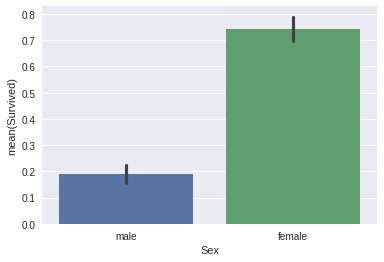

In [10]:
#draw a bar plot of survival by sex
sns.barplot(x= 'Sex',y='Survived',data=train)

#print % of female vs. male that survived
print('Percentage of female who survived:',train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100)

print('Percentage of male who survived:',train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1]*100)

So, Female have a much higher chance of survival than males. The Sex feature is essential in our prediction.

##Pclass Feature

petcentage of Pclass=1 who survived: 62.96296296296296
petcentage of Pclass=2 who survived: 47.28260869565217
petcentage of Pclass=3 who survived: 24.236252545824847


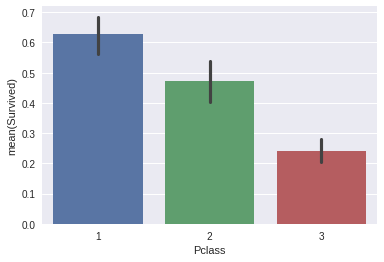

In [11]:
#draw a bar plot of survival by Pclass
sns.barplot(x='Pclass', y='Survived',data=train)

# Percentage of people that survived by Pclass
#class 1 = Upper
print('petcentage of Pclass=1 who survived:', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)

#class 2 = Middle
print('petcentage of Pclass=2 who survived:', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)

#class 3 = Lower
print('petcentage of Pclass=3 who survived:', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

People with higher socio-economic class had a higher rate of survival. Z

##SibSp Feature

Percentage of SibSp = 0 who suvived: 34.53947368421053
Percentage of SibSp = 1 who suvived: 53.588516746411486
Percentage of SibSp = 2 who suvived: 46.42857142857143
Percentage of SibSp = 3 who suvived: 25.0
Percentage of SibSp = 4 who suvived: 16.666666666666664


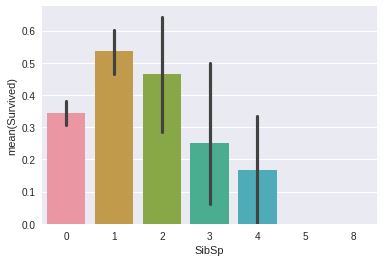

In [12]:
#draw a bar plot for SibSp vs. Survival
sns.barplot(x='SibSp',y='Survived',data=train)

# The percentage of people survived
print("Percentage of SibSp = 0 who suvived:",train['Survived'][train['SibSp']==0].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 1 who suvived:",train['Survived'][train['SibSp']==1].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 2 who suvived:",train['Survived'][train['SibSp']==2].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 3 who suvived:",train['Survived'][train['SibSp']==3].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 4 who suvived:",train['Survived'][train['SibSp']==4].value_counts(normalize=True)[1]*100)

In general, those with more siblings or spouses aboard were less likely to survive. However, people with no sibling or spouses were less likely to survive than those with one or two.

##Parch Feature

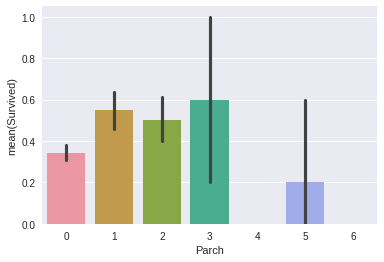

In [13]:
#draw a bar plot for parch vs.survival
sns.barplot(x='Parch',y='Survived',data=train)

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people with no parents or children are less likely to survive than those with 1-3 parent or children

##Age Feature

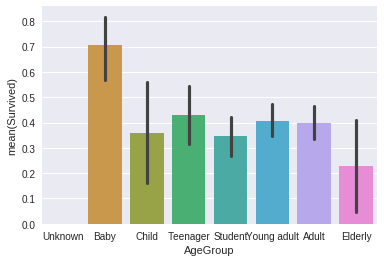

In [14]:
#sort the ages into logical categories
#train["Age"] = train["Age"].fillna(-0.5)
#test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Elderly']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

# Draw a bar plot for age vs. survival
sns.barplot(x='AgeGroup',y='Survived',data=train)

Babies are more likely to survive than any other group

##Cabin Feature

percentage of CabinBool = 1 who survived: 66.66666666666666
percentage of CabinBool = 0 who survived: 29.985443959243085


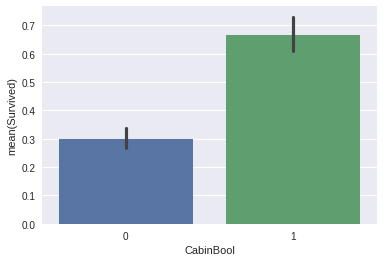

In [15]:
# to convert the alphanum values to integer for ploting
train['CabinBool'] = train['Cabin'].notnull().astype('int')
test['CabinBool'] = test['Cabin'].notnull().astype('int')

sns.barplot(x='CabinBool', y='Survived', data=train )

# Calculate percentage of CabinBool vs. Survived
print('percentage of CabinBool = 1 who survived:',train['Survived'][train['CabinBool']==1].value_counts(normalize=True)[1]*100)

print('percentage of CabinBool = 0 who survived:',train['Survived'][train['CabinBool']==0].value_counts(normalize=True)[1]*100)


People with a recorded Cabin number are more likely to survive.

##Embarked Feature

percentage of Embarked = S who survived: 33.69565217391305
percentage of Embarked = C who survived: 55.35714285714286
percentage of Embarked = Q who survived: 38.961038961038966


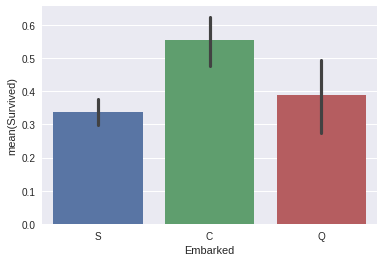

In [16]:
# Draw a bar plot of port of embarkment vs. survival
sns.barplot(x='Embarked', y='Survived', data=train )

# Calculate percentage of CabinBool vs. Survived
print('percentage of Embarked = S who survived:',train['Survived'][train['Embarked']=='S'].value_counts(normalize=True)[1]*100)


print('percentage of Embarked = C who survived:',train['Survived'][train['Embarked']=='C'].value_counts(normalize=True)[1]*100)
      
      
print('percentage of Embarked = Q who survived:',train['Survived'][train['Embarked']=='Q'].value_counts(normalize=True)[1]*100)

So people who boarded from C = Cherbourg are more likely to survive than people from  Q = Queenstown, S = Southampton.

#5) Cleaning Data
Now we will clean our data to account for missing values.

##Looking at the test data
Let's see how our test data look

In [17]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,332,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,7,NaN
top,NaN,NaN,"Sage, Mr. John George",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000




*   We have a total of 418 pasengers.
*   1 value from the Fare feature is missing.
*    Around 78..2% of Cabin Feature is missing, we need to fill that in.



##Ticket Feature

In [0]:
# we can drop the Ticket feature since it's unlikely to yeild any useful information
train.drop(['Ticket'], axis = 1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

##Embarked Feature

In [19]:
 #now we need to fill in the missing value in the embarked feature
  print("Number of People embarking in Southampton(S):")
  southampton = train[train['Embarked']== 'S'].shape[0]
  print(southampton)
  
  print("Number of People embarking in Cherbourg(C):")
  cherbourg = train[train['Embarked']== 'C'].shape[0]
  print(cherbourg)
        
  print("Number of People embarking in Queenstown(Q):")
  queenstown = train[train['Embarked']== 'Q'].shape[0]
  print(queenstown)

Number of People embarking in Southampton(S):
644
Number of People embarking in Cherbourg(C):
168
Number of People embarking in Queenstown(Q):
77


So its clear that majority of people embarked from southampton. Let's fill the missing values with S.

In [0]:
#replacing the missing values in the embarked feature with s
train = train.fillna({"Embarked":"S"})

##Age Feature

Next we'll fill in the missing values in age feature. Since a higher percemtage of values are missing, it would be illogical to fill all of them with the same value(as we did with embarked). Instead, let's try to find a way to pridict the missing age.

First we will get the title of passenger from there name. then, we will try to map then into certain age group.

In [21]:
# create a combined group of both dataset
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# Replace various titles with more common names
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
  dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
  dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()  
  
  

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [23]:
# Map each title to a numerical number
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Young adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Young adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Young adult,0,1


In [24]:
# group by Sex, Pclass, and Title
#combined = train.append(test,ignore_index=True)
grouped = train.groupby(['Sex','Pclass', 'Title'])
grouped2 = test.groupby(['Sex','Pclass', 'Title'])
# view the median Age by the grouped features 
grouped.Age.median()
grouped2.Age.median()

Sex     Pclass  Title
female  1       2        32.0
                3        48.0
                6        39.0
        2       2        19.5
                3        29.0
        3       2        22.0
                3        28.0
male    1       1        42.0
                4         9.5
                6        53.0
        2       1        28.0
                4         5.0
                6        35.5
        3       1        25.0
                4         7.0
Name: Age, dtype: float64

Instead of simply filling in the missing Age values with the mean or median age of the dataset, by grouping the data by a passenger’s sex, class, and title, we can drill down a bit deeper and get a closer approximation of what a passenger’s age might have been. Using the grouped.Age variable, we can fill in the missing values for Age.

In [0]:
# apply the grouped median value on the Age NaN
train.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
test.Age = grouped2.Age.apply(lambda x: x.fillna(x.median()))

In [26]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
AgeGroup       714 non-null category
CabinBool      891 non-null int64
Title          891 non-null int64
dtypes: category(1), float64(2), int64(7), object(4)
memory usage: 91.8+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp       

##Name Feature

we can drop name feature now as we've extracted the title.

In [0]:
#drop the name feature
train.drop(['Name'], axis = 1, inplace=True)
test.drop(['Name'],axis = 1, inplace=True)

##Sex Feature

In [28]:
# map each sex value to anumerical value
sex_mapping = {"male":0,"female":1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,Student,0,1
1,2,1,1,1,38.0,1,0,71.2833,C85,C,Adult,1,3
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,Young adult,0,2
3,4,1,1,1,35.0,1,0,53.1000,C123,S,Young adult,1,3
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,Young adult,0,1


In [0]:
train.drop('AgeGroup',axis=1,inplace=True)
test.drop('AgeGroup',axis=1,inplace=True)

In [30]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
CabinBool      891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Ca

##Embarked Feature

In [0]:
# Map each Embarked value to a numerical value
embarked_mapping = {'S':1,'C':2,'Q':3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [0]:
#Drop the cabin Feature
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

##Fare Feature
We will seaperate the fare value into logical groups as well as filling in single missing value in the dataset.

In [0]:
#fill in the missing Fare value in Test set based on mean fare for that Pclass
for x in range(len(test['Fare'])):
  if pd.isnull(test['Fare'][x]):
    pclass = test['Pclass'][x]  #Pclass = 3
    test['Fare'][x] = round(train[train['Pclass'] == pclass]['Fare'].mean(), 4)
    
# maping Fare into Group of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train.drop(['Fare'],axis=1,inplace=True)
test.drop(['Fare'],axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,CabinBool,Title,FareBand
0,1,0,3,0,22.0,1,0,1,0,1,1
1,2,1,1,1,38.0,1,0,2,1,3,4
2,3,1,3,1,26.0,0,0,1,0,2,2
3,4,1,1,1,35.0,1,0,1,1,3,4
4,5,0,3,0,35.0,0,0,1,0,1,2


In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,CabinBool,Title,FareBand
0,892,3,0,34.5,0,0,3,0,1,1
1,893,3,1,47.0,1,0,1,0,3,1
2,894,2,0,62.0,0,0,3,0,1,2
3,895,3,0,27.0,0,0,1,0,1,2
4,896,3,1,22.0,1,1,1,0,3,2


#6) Choosing the best model

## Spliting the Training Data
We will use part of our traing data(22% in this case) to test accuracy of our different models.


In [0]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

##Model
Here i will be using Support Vector Machine(SVM) to predict my output.

In [37]:
#SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.25


#7) Creating Submission File
it's time to create a submission.csv file to upload to the Kaggle Compettiton!


In [0]:
#set ids as PassengeId and predict survival
ids = test['PassengerId']
predictions = svc.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({'PassengerId':ids, 'Survived':predictions})
output.to_csv('submission.csv', index=False)

In [0]:
#This give a list of folder and ids in your google drive
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
# Copy the id of the folder where you want to save the submission file
file = drive.CreateFile({'parents':[{u'id': '1k07cPswDphxQ7ru58fd5kLQ-ZiAy6_uZ'}]}) 
file.SetContentFile("submission.csv")
file.Upload()